In [1]:
# random imputation- missing value are filled with random value of that column value. it can be 
# applied to both numerical and categorical data. we need to do this in pandas sklearn doest not have any class for it.
# data distribution dosent changes/ dosent work good with decision trees algorithm
# corelation with other column get disturbed beacuse of introduction of random ness
# it is memory heavy based imputation beause on server if we have missing value we need the entire collumn value to predict the missing value from random value
# well suited for linear model as it does not distort the distribution regardless of the % of NA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [10]:
x_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [11]:
x_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [12]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [13]:
x_train['Age_imputed'].isnull()

30     False
10     False
873    False
182    False
876    False
       ...  
534    False
584     True
493    False
527     True
168     True
Name: Age_imputed, Length: 712, dtype: bool

In [18]:
mask = x_train['Age_imputed'].isnull()

x_train.loc[mask, 'Age_imputed'] = (
    x_train['Age'].dropna()
    .sample(mask.sum(), replace=True, random_state=42)
    .values
)

In [19]:
mask_test = x_test['Age_imputed'].isnull()

x_test.loc[mask_test, 'Age_imputed'] = (
    x_test['Age'].dropna()
    .sample(mask_test.sum(), replace=True)
    .values
)


In [20]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,62.0
493,71.0,49.5042,71.0
527,NaN,221.7792,25.0


C:\Users\91983\AppData\Local\Temp\ipykernel_2916\4101482922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Orginal',hist=False)
C:\Users\91983\AppData\Local\Temp\ipykernel_2916\4101482922.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Ag

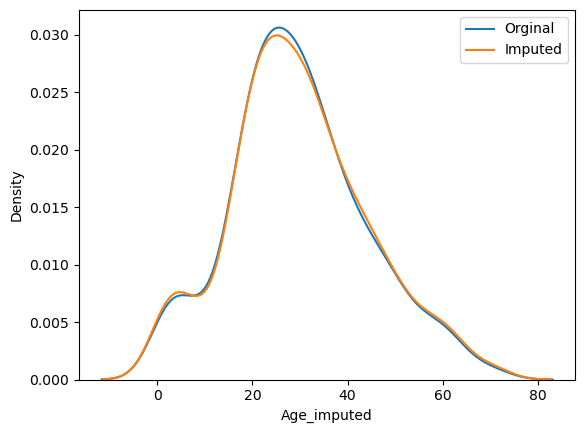

In [22]:
sns.distplot(x_train['Age'],label='Orginal',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [24]:
print('orginal variable variance:',x_train['Age'].var())
print('variance after random imputation:',x_train['Age_imputed'].var())


orginal variable variance: 204.3495133904614
variance after random imputation: 211.92181903297325


In [25]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,59.650621
Age,71.512440,204.349513,204.349513
Age_imputed,59.650621,204.349513,211.921819


<Axes: >

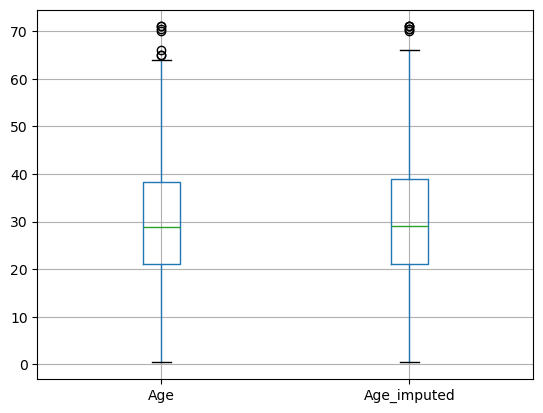

In [26]:
x_train[['Age','Age_imputed']].boxplot()

In [ ]:
# if the fare is same then age is not need to be chnage at production when the fare given by user is 40 then his age need to be 20 again if the fare is 40
sampled_value=x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

In [27]:
data=pd.read_csv('train1.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [28]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [30]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [31]:
x=data
y=data['SalePrice']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']
x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']



In [35]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1015,NaN,TA,227000,TA,NaN
1031,TA,TA,197000,TA,TA
310,TA,TA,165600,TA,TA
530,Fa,TA,175000,TA,Fa
279,TA,TA,192000,TA,TA


In [39]:
# GarageQual imputation
mask_train_garage = x_train['GarageQual_imputed'].isnull()
x_train.loc[mask_train_garage, 'GarageQual_imputed'] = (
    x_train['GarageQual'].dropna()
    .sample(mask_train_garage.sum(), replace=True, random_state=42)
    .values
)

mask_test_garage = x_test['GarageQual_imputed'].isnull()
x_test.loc[mask_test_garage, 'GarageQual_imputed'] = (
    x_train['GarageQual'].dropna()  # sampling from training set
    .sample(mask_test_garage.sum(), replace=True, random_state=42)
    .values
)

# FireplaceQu imputation
mask_train_fire = x_train['FireplaceQu_imputed'].isnull()
x_train.loc[mask_train_fire, 'FireplaceQu_imputed'] = (
    x_train['FireplaceQu'].dropna()
    .sample(mask_train_fire.sum(), replace=True, random_state=42)
    .values
)

mask_test_fire = x_test['FireplaceQu_imputed'].isnull()
x_test.loc[mask_test_fire, 'FireplaceQu_imputed'] = (
    x_train['FireplaceQu'].dropna()  # sampling from training set
    .sample(mask_test_fire.sum(), replace=True, random_state=42)
    .values
)


In [40]:

temp = pd.concat(
        [
            x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
            x_train['GarageQual_imputed'].value_counts() / len(x_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [41]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


C:\Users\91983\AppData\Local\Temp\ipykernel_2916\953161725.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\91983\AppData\Local\Temp\ipykernel_2916\953161725.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

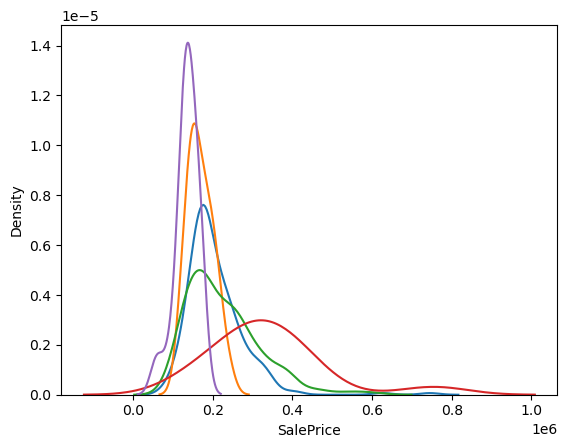

In [42]:

for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\91983\AppData\Local\Temp\ipykernel_2916\3367775141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\91983\AppData\Local\Temp\ipykernel_2916\3367775141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

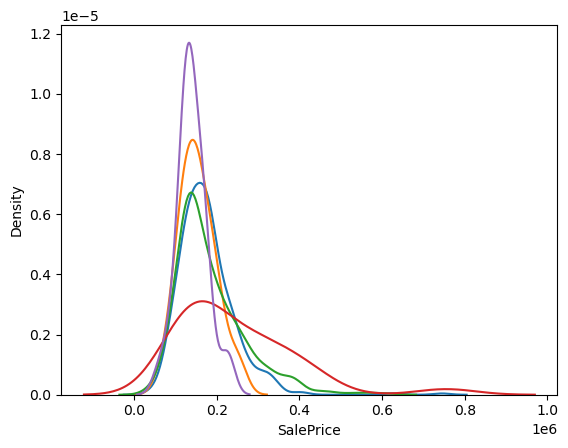

In [44]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()
